![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 6-MODUL. Deep Learning 
## II-qism

# Loyiha va uni mahsulotga aylantirish

#### Kutubxonalarni o'rnatib olamiz

Bizga kerak bo'ladi:

 - `fastai==2.5.3` versiyasi
 - `torch==1.10.0+cu111` versiyasi 

Eslatma: Kurs yozilgan vaqtda yuqoridagi versiyalardan foydalanilgan. 

In [ ]:
# !pip install fastai==2.5.3

 Kutubxonalarni tekshirish

In [1]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

1.10.0+cu111
2.5.3


# Dataset

Dataset yuklab olish uchun `Google`ning  [`Open Images Dataset v4`](https://storage.googleapis.com/openimages/web/index.html) ochiq ma'lumotlaridan foydalanamiz. Bu dataset [`600`](https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy_visualizer/circle.html) ta sinfdan(class) iborat `1.7 mln` rasmni o'z ichiga. 



*** Bu rasmlarni yuklab olish uchun `OIDv4_ToolKit` dan foydalanamiz. (https://github.com/EscVM/OIDv4_ToolKit)

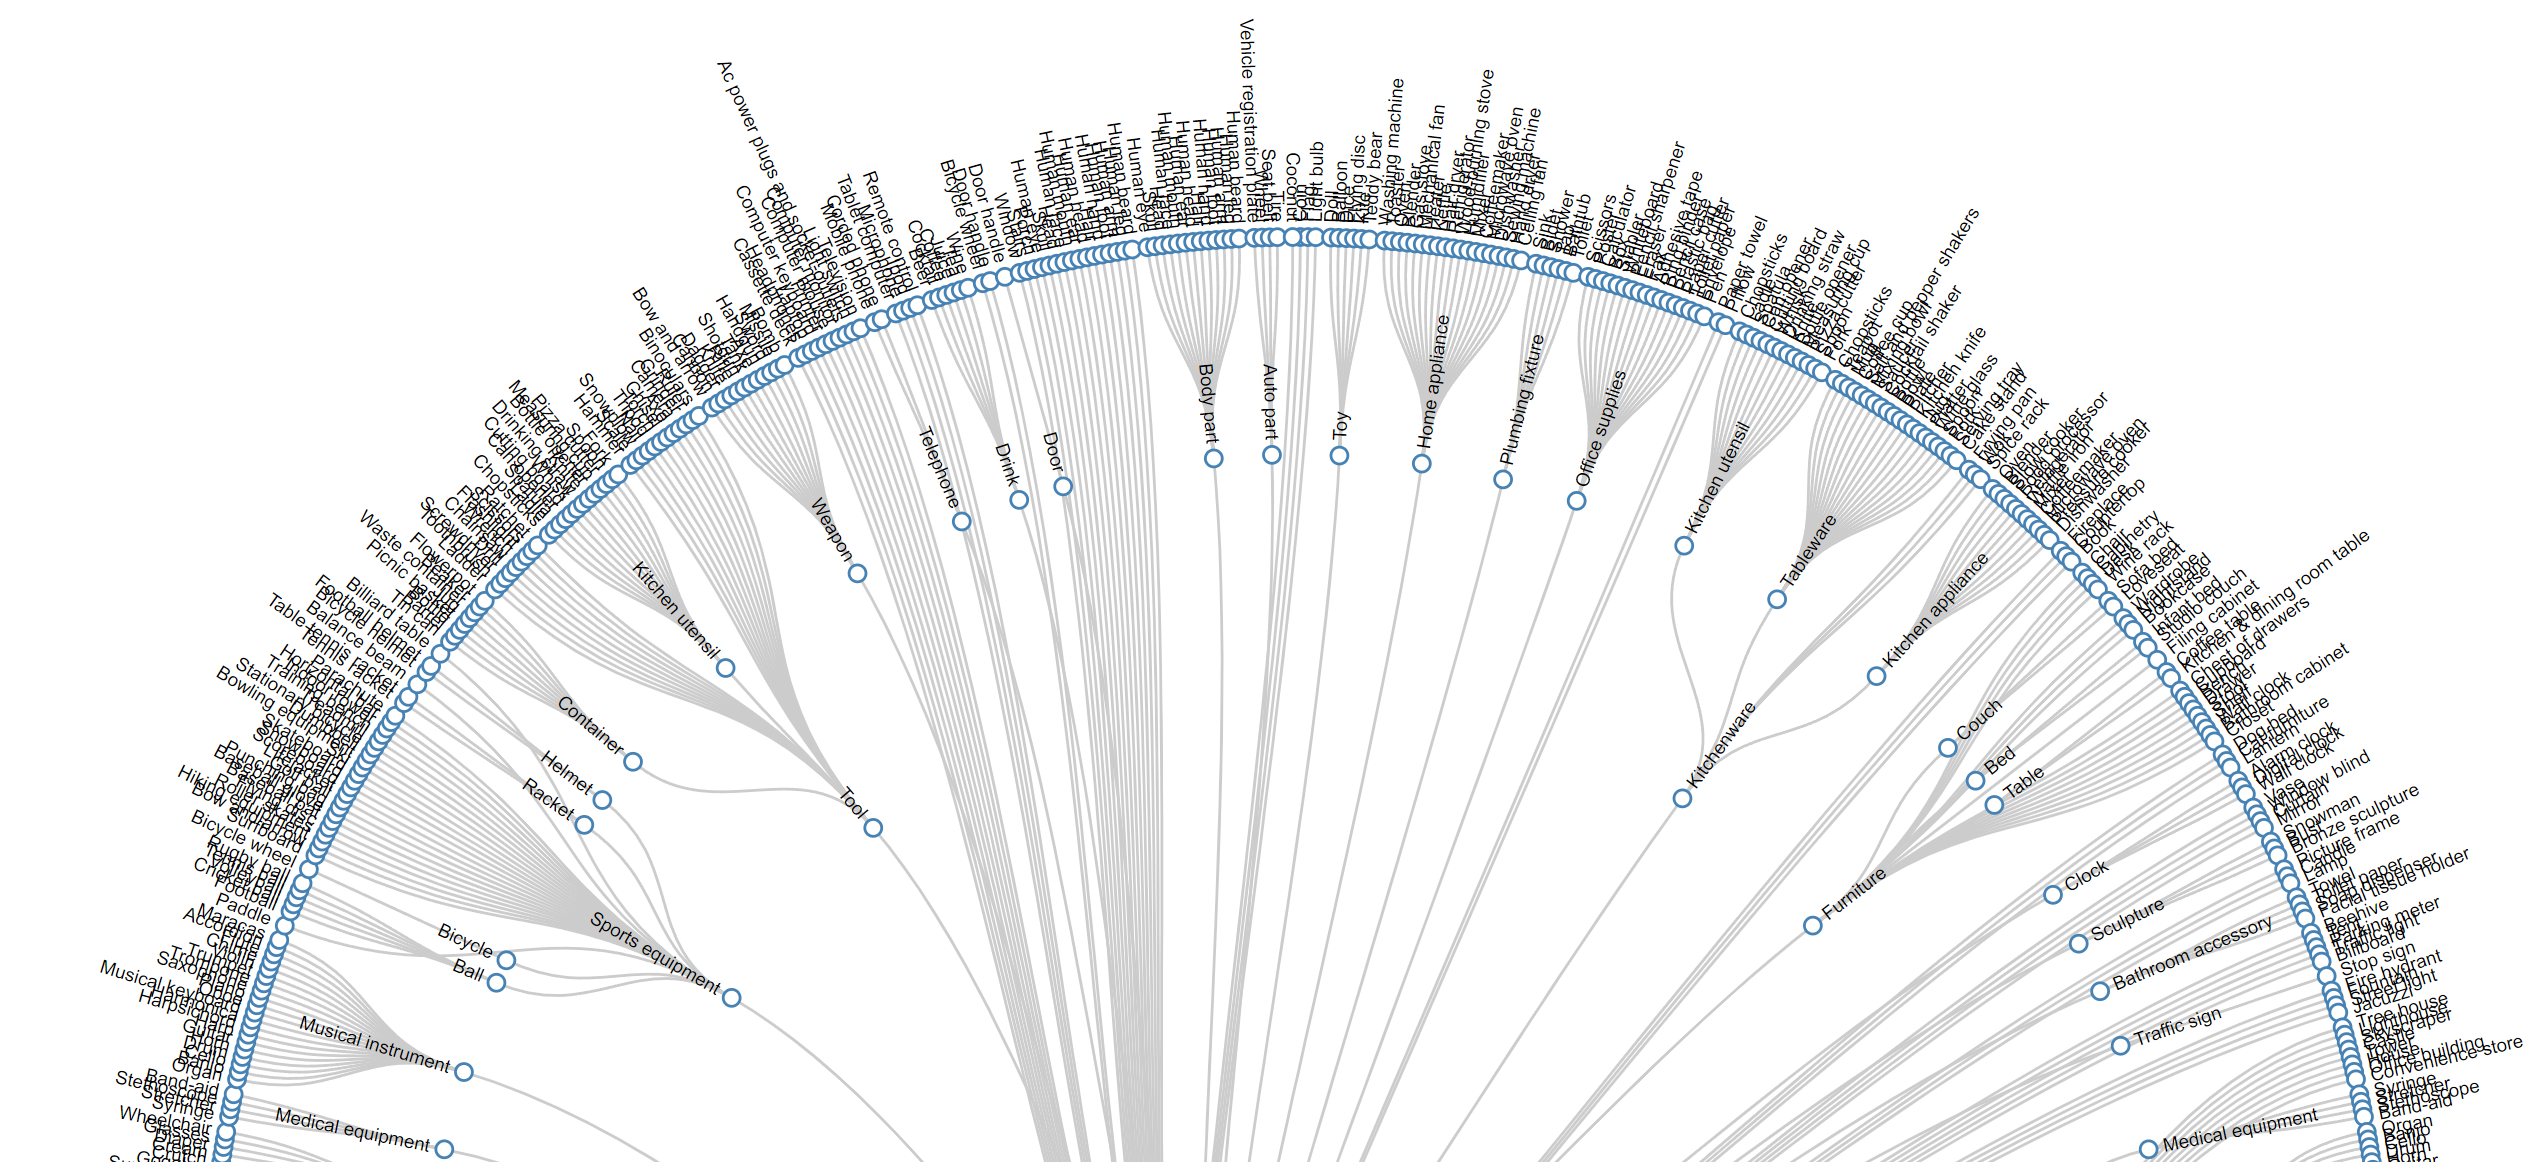

## `OIDv4_Toolkit`ni yuklab olish 

In [ ]:
# !git clone https://github.com/EscVM/OIDv4_ToolKit.git
# !cd OIDv4_ToolKit && pip install -r requirements.txt

`help`

In [ ]:
# !cd OIDv4_ToolKit && python main.py -h

Biz bu loyihamiz uchun uch turdagi(`Avtomobil`, `Samalyot`, `Suv tranportlari(kema, qayiq)`) transportlarni klassifikatsiya qila oladigan model quramiz. Shuning uchun ham OIDv4_Toolkit yordamida har bir klass uchun `200` tadan rasm yuklab olamiz. 

In [2]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.

Car
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 89465 online images for train.
    [INFO] | Limiting to 200 images.
    [INFO] | Download of 200 images in train.
100% 20

## Model

In [8]:
from fastai.vision.all import *
from ipywidgets import widgets

# path
path = Path('train')
# fls = get_image_files(path)
# failed = verify_images(path)

# Datablock yaratamiz
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, 
    item_tfms=Resize(224)
)

# Dataloader yaratamiz
dls = transports.dataloaders(path)

#datasetni tekshirish
# dls.train.show_batch(max_n=32, nrows=4)

# O'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.363527,0.372150,0.883333,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.475519,0.275309,0.916667,00:14
1,0.327497,0.292568,0.900000,00:15
2,0.250039,0.317067,0.916667,00:15
3,0.197611,0.327716,0.925000,00:15


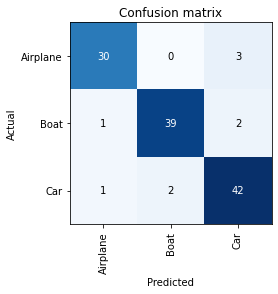

In [9]:
# tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

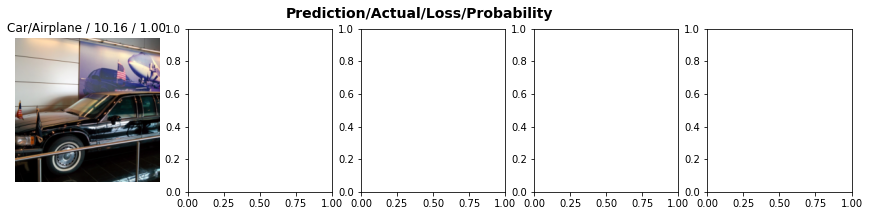

In [11]:
interp.plot_top_losses(5, nrows=1)

## Modelni tekshirib ko'ramiz

In [12]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [16]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat: {pred}')
print(f'Ehtimollik: {probs[pred_id]*100:.1f}')
img

Output hidden; open in https://colab.research.google.com to view.

## O'qitilgan modelimizni saqlab olamiz

In [21]:
learn.export('transport_model.pkl')

## O'qitilgan modelmizni yuklab olib tekshirib ko'ramiz

In [23]:
model = load_learner("/content/transport_model.pkl")

In [24]:
model.predict(img)

('Airplane', TensorBase(0), TensorBase([9.9971e-01, 5.1931e-05, 2.3424e-04]))

# Modeldan mahsulotgacha

# Deploy qilish

## Modelimizni web-dasturga o'girish uchun `Streamlit` kutubxonasidan foydlanamiz va uni `Streamlit Cloud`ni o'zida deploy qilamiz. 

### Buning uchun:
* Biror `IDE` foydalanishingiz kerak (VS Code, Sublime text, Spyder va h.k. )
* Virtual environmentdan foydalana olishingiz
* Githubdan foydalana olishingiz kerak bo'ladi